In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Perform Basic Data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

### PROFIT ~ RND
### PROFIT is target feature (Which im trying to predict based on RND budget of startup)
### PROFIT_pred = B0 + B1*RND
### Seperate X and Y from the dataframe!


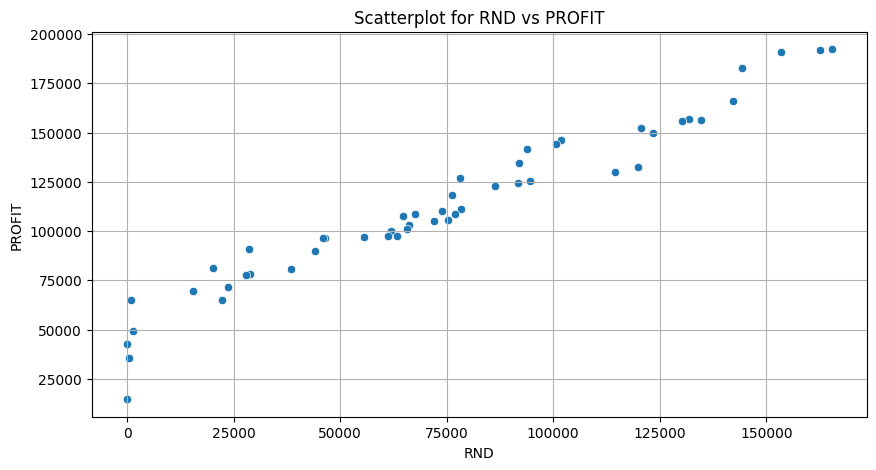

In [9]:
# Visualize RND vs PROFIT
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='RND', y='PROFIT')
plt.title('Scatterplot for RND vs PROFIT')
plt.grid()
plt.show()

### Seperated X and Y terms

In [6]:
X = df[['RND']]
Y = df[['PROFIT']]

### Create a Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [15]:
# Slope value
B1 = model.coef_
B1

array([[0.85429137]])

In [18]:
B0 = model.intercept_
B0

array([49032.89914125])

### PROFIT_pred = 49032.90 + 0.8543*RND

### Evaluate the Model

In [19]:
r2 = model. score (X, Y)
r2

0.9465353160804393

### As I m getting r2 score of 0.9465 the model is a good model as r2=0.8

### Visulize the fitted straight line

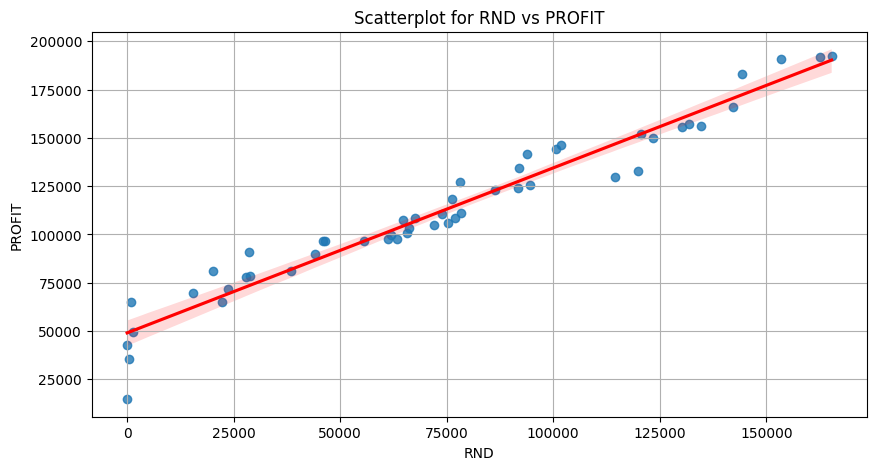

In [21]:
# Visualize RND vs PROFIT
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color' : 'red'})
plt.title('Scatterplot for RND vs PROFIT')
plt.grid()
plt.show()

### Estimate the prediced values by the model

In [23]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [24]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Estimate the other metrics MSE, RMSE, MAE, MAPE, R2

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


In [26]:
mse = mean_squared_error (Y, ypred)
mse

85120931.32706906

In [27]:
rmse = mse** (1/2)
rmse

9226.100548285232

In [29]:
mae = mean_absolute_error (Y, ypred)
mae

6910.984354579613

In [30]:
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.11070141081984844

In [34]:
r2 = r2_score(Y, ypred)
r2 

0.9465353160804393

### Above model has a good r2 score of 0.9465 which more than 0.8

### 1. RND increases by 1000, profit increases by 854.3
### 2. RND and PROFIT have strong linear relationship because of good r2 score of 0.94